<a href="https://colab.research.google.com/github/PedroHdez35/allura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis y comparativa de tiendas Allura**

En el presente análisis se pretende realizar una comparativa sobre los datos de la eficiencia y recepción del público con respecto a las 4 tiendas que conforman este grupo comercial.

## **1.- Análisis de los datos**

### 1.1.- Importación de datos



En esta parte se realiza la importación de los datos utilizando la biblioteca PANDAS

In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


###1.2.- Análisis de facturación



Se calcula el total de los ingresos generados en cada tienda, utilizando la función .sum[] aplicado a la columna Precio de cada base de datos

In [26]:
tienda1_totalventas = tienda['Precio'].sum()
tienda2_totalventas = tienda2['Precio'].sum()
tienda3_totalventas = tienda3['Precio'].sum()
tienda4_totalventas = tienda4['Precio'].sum()
ventascompletas = tienda1_totalventas + tienda2_totalventas + tienda3_totalventas + tienda4_totalventas

totales = [tienda1_totalventas, tienda2_totalventas, tienda3_totalventas, tienda4_totalventas]
indicetotales = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
serie1 = pd.Series(totales, index=indicetotales)

# Desactivar la notación científica para los floats en pandas
pd.options.display.float_format = '{:.2f}'.format

print(serie1)

Tienda 1   1150880400.00
Tienda 2   1116343500.00
Tienda 3   1098019600.00
Tienda 4   1038375700.00
dtype: float64


In [27]:
diferencia = serie1.max() - serie1.min()
print('La diferencia de ventas entre la tienda con más ventas (', serie1.idxmax(), ') y la tienda con menos ventas (', serie1.idxmin(), ') es de ', diferencia)

La diferencia de ventas entre la tienda con más ventas ( Tienda 1 ) y la tienda con menos ventas ( Tienda 4 ) es de  112504700.0


In [28]:
ventascompletas

np.float64(4403619200.0)

### 1.3.- Ventas por categoría

Se calcula la cantidad de ventas por categoría de producto para cada tienda. Para hacer esto, primero se genera un nuevo DF para cada tienda, con los datos agrupados utilizando la función .groupby[]

Posteriormente, se calcula el total de los valores únicos utilizando la función .value_counts() y se ordenan con la función .sort_values()

In [29]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [30]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [31]:
df_tienda1_ventas_por_categoria = tienda.groupby('Categoría del Producto')
vo1 = df_tienda1_ventas_por_categoria['Categoría del Producto'].value_counts().sort_values(ascending=False)

In [32]:
df_tienda2_ventas_por_categoria = tienda2.groupby('Categoría del Producto')
vo2 = df_tienda2_ventas_por_categoria['Categoría del Producto'].value_counts().sort_values(ascending=False)

In [33]:
df_tienda3_ventas_por_categoria = tienda3.groupby('Categoría del Producto')
vo3 = df_tienda3_ventas_por_categoria['Categoría del Producto'].value_counts().sort_values(ascending=False)

In [34]:
df_tienda4_ventas_por_categoria = tienda4.groupby('Categoría del Producto')
vo4 = df_tienda4_ventas_por_categoria['Categoría del Producto'].value_counts().sort_values(ascending=False)

### 1.4.- Calificación promedio de la tienda


Se calcula la calificación promedio que los clientes le dieron a cada tienda utilizando la funcion .mean()

In [35]:
promedio1 = tienda['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

In [36]:
data = [promedio1, promedio2, promedio3, promedio4]
index = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
serie = pd.Series(data, index=index)
print(serie)

Tienda 1   3.98
Tienda 2   4.04
Tienda 3   4.05
Tienda 4   4.00
dtype: float64


### 1.5.- Productos más y menos vendidos

Se debe indicar que productos fueron los más y los menos vendidos en cada tienda, para ello, se ordenan los datos de cada tienda por producto más vendido de mayor a menor.

Luego para comparar, se hace un nuevo df donde se concatenan los head y los tail de cada Serie, respetando el orden que ya habíamos creado

In [37]:
df_tienda1_popularidad_productos = tienda.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False)
df_tienda2_popularidad_productos = tienda2.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False)
df_tienda3_popularidad_productos = tienda3.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False)
df_tienda4_popularidad_productos = tienda4.groupby('Producto')['Producto'].value_counts().sort_values(ascending=False)


In [38]:
comparativa_mas_populares = pd.concat([df_tienda1_popularidad_productos.head(3).reset_index(), df_tienda2_popularidad_productos.head(3).reset_index(), df_tienda3_popularidad_productos.head(3).reset_index(), df_tienda4_popularidad_productos.head(3).reset_index()], axis=1)

# Renombrar las columnas para mayor claridad
comparativa_mas_populares.columns = ['Producto Tienda 1', 'Cantidad', 'Producto Tienda 2', 'Cantidad', 'Producto Tienda 3', 'Cantidad', 'Producto Tienda 4', 'Cantidad']

display(comparativa_mas_populares)

,Producto Tienda 1,Cantidad,Producto Tienda 2,Cantidad,Producto Tienda 3,Cantidad,Producto Tienda 4,Cantidad
0,Armario,60,Iniciando en programación,65,Kit de bancas,57,Cama box,62
1,TV LED UHD 4K,60,Microondas,62,Mesa de comedor,56,Cubertería,59
2,Microondas,60,Batería,61,Cama king,56,Cama king,56


In [39]:
comparativa_menos_populares = pd.concat([df_tienda1_popularidad_productos.tail(3).reset_index(), df_tienda2_popularidad_productos.tail(3).reset_index(), df_tienda3_popularidad_productos.tail(3).reset_index(), df_tienda4_popularidad_productos.tail(3).reset_index()], axis=1)

# Renombrar las columnas para mayor claridad
comparativa_menos_populares.columns = ['Producto Tienda 1', 'Cantidad', 'Producto Tienda 2', 'Cantidad', 'Producto Tienda 3', 'Cantidad', 'Producto Tienda 4', 'Cantidad']

display(comparativa_menos_populares)

,Producto Tienda 1,Cantidad,Producto Tienda 2,Cantidad,Producto Tienda 3,Cantidad,Producto Tienda 4,Cantidad
0,Olla de presión,35,Impresora,34,Microondas,36,Guitarra acústica,37
1,Celular ABXY,33,Mesa de comedor,34,Set de vasos,36,Armario,34
2,Auriculares con micrófono,33,Juego de mesa,32,Bloques de construcción,35,Guitarra eléctrica,33


### 1.6.- Envío promedio por tienda

Se calcula el costo de envio promedio por cada tienda, utilizando la funcion .mean()

In [40]:
promedioenvio1 = tienda['Costo de envío'].mean()
promedioenvio2 = tienda2['Costo de envío'].mean()
promedioenvio3 = tienda3['Costo de envío'].mean()
promedioenvio4 = tienda4['Costo de envío'].mean()

In [41]:
envios = [promedioenvio1, promedioenvio2, promedioenvio3, promedioenvio4]
envios

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

## **2.- Visualización de datos**

### 2.1- Gráfica de Barras mostrando los tres productos más vendidos por tienda

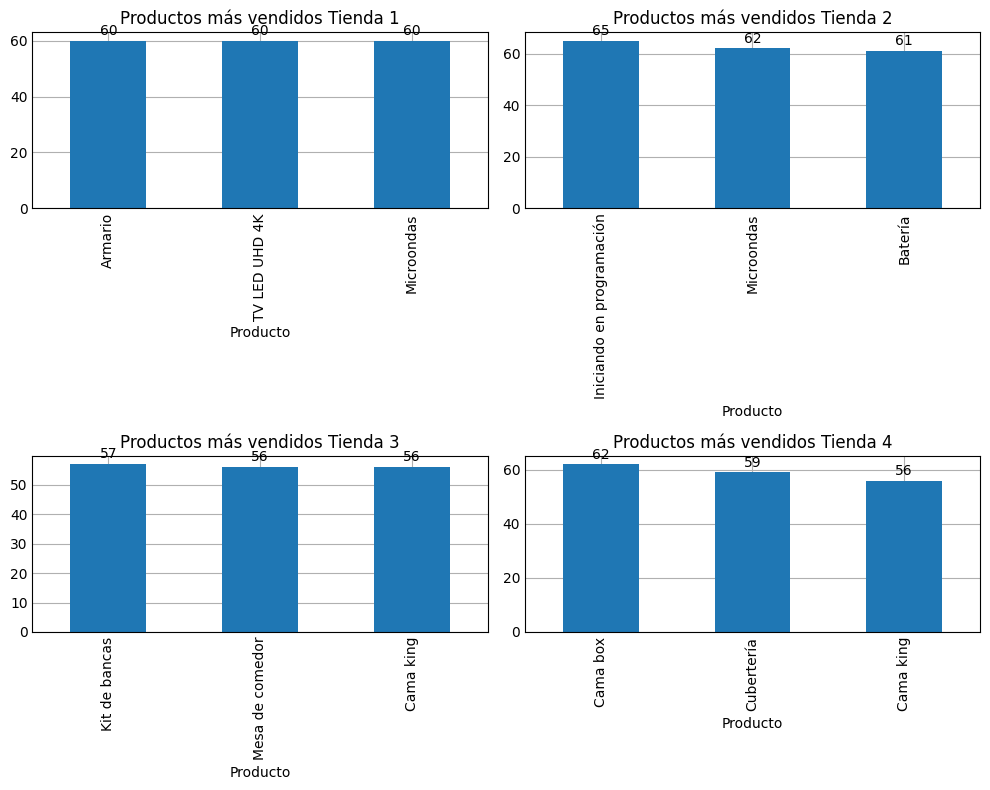

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Tienda 1
df_tienda1_popularidad_productos.head(3).plot(kind='bar', ax=axes[0, 0], title='Productos más vendidos Tienda 1')
for i, v in enumerate(df_tienda1_popularidad_productos.head(3).values):
    axes[0, 0].text(i, v + 1, str(v), ha='center', va='bottom')

# Plot for Tienda 2
df_tienda2_popularidad_productos.head(3).plot(kind='bar', ax=axes[0, 1], title='Productos más vendidos Tienda 2')
for i, v in enumerate(df_tienda2_popularidad_productos.head(3).values):
    axes[0, 1].text(i, v + 1, str(v), ha='center', va='bottom')

# Plot for Tienda 3
df_tienda3_popularidad_productos.head(3).plot(kind='bar', ax=axes[1, 0], title='Productos más vendidos Tienda 3')
for i, v in enumerate(df_tienda3_popularidad_productos.head(3).values):
    axes[1, 0].text(i, v + 1, str(v), ha='center', va='bottom')


# Plot for Tienda 4
df_tienda4_popularidad_productos.head(3).plot(kind='bar', ax=axes[1, 1], title='Productos más vendidos Tienda 4')
for i, v in enumerate(df_tienda4_popularidad_productos.head(3).values):
    axes[1, 1].text(i, v + 1, str(v), ha='center', va='bottom')


plt.tight_layout()
plt.show()

### 2.2 Gráfica de pastel mostrando el porcentaje de ventas correspondiente a cada tienda

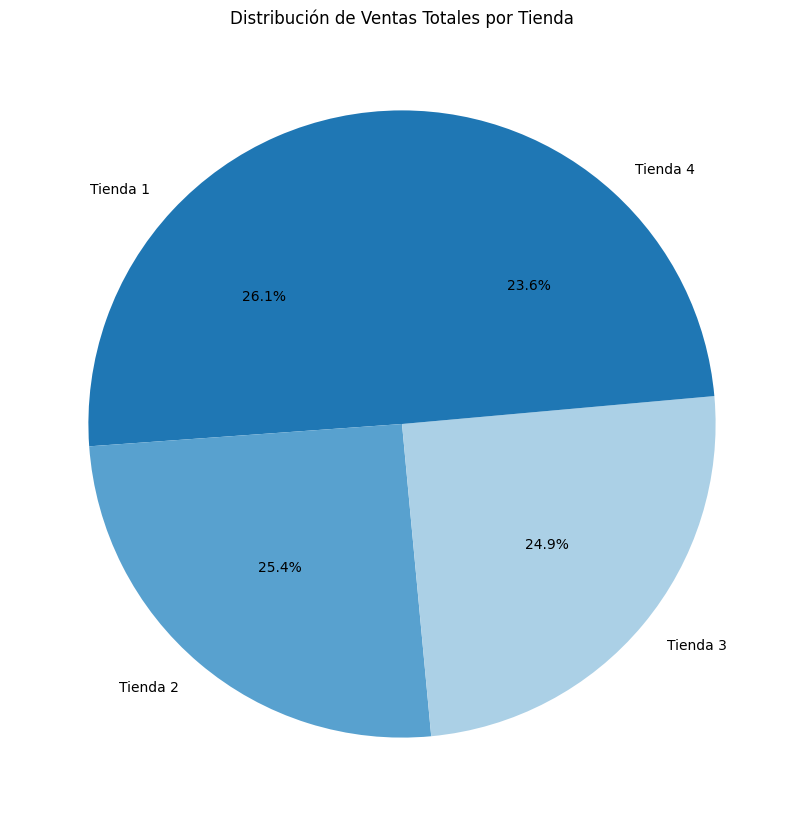

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
serie1.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
ax.set_title('Distribución de Ventas Totales por Tienda')
ax.set_ylabel('') # Eliminar el label por defecto del eje y

plt.show()

### 2.3.- Gráficas de pastel realizando una comparativa de las categorías más vendidas por tienda

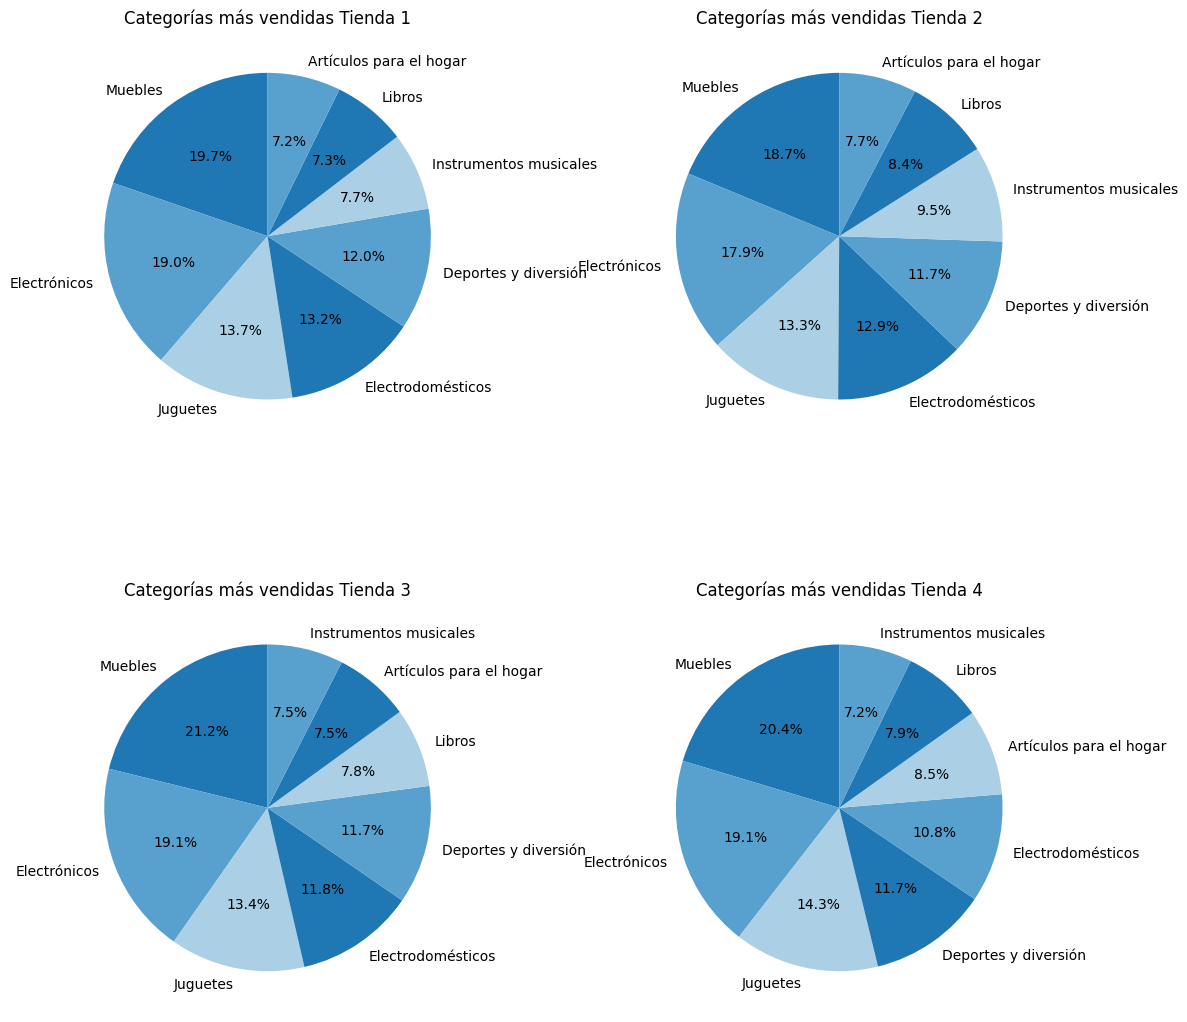

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

vo1.plot(kind='pie', ax=axes[0, 0], title='Categorías más vendidas Tienda 1',ylabel='', autopct='%1.1f%%', startangle=90)
vo2.plot(kind='pie', ax=axes[0, 1], title='Categorías más vendidas Tienda 2',ylabel='',autopct='%1.1f%%', startangle=90)
vo3.plot(kind='pie', ax=axes[1, 0], title='Categorías más vendidas Tienda 3',ylabel='',autopct='%1.1f%%', startangle=90)
vo4.plot(kind='pie', ax=axes[1, 1], title='Categorías más vendidas Tienda 4',ylabel='',autopct='%1.1f%%', startangle=90)

##plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### 2.4.- Gráficas de violín comparando las calificaciones de cada tienda dadas por los compradores

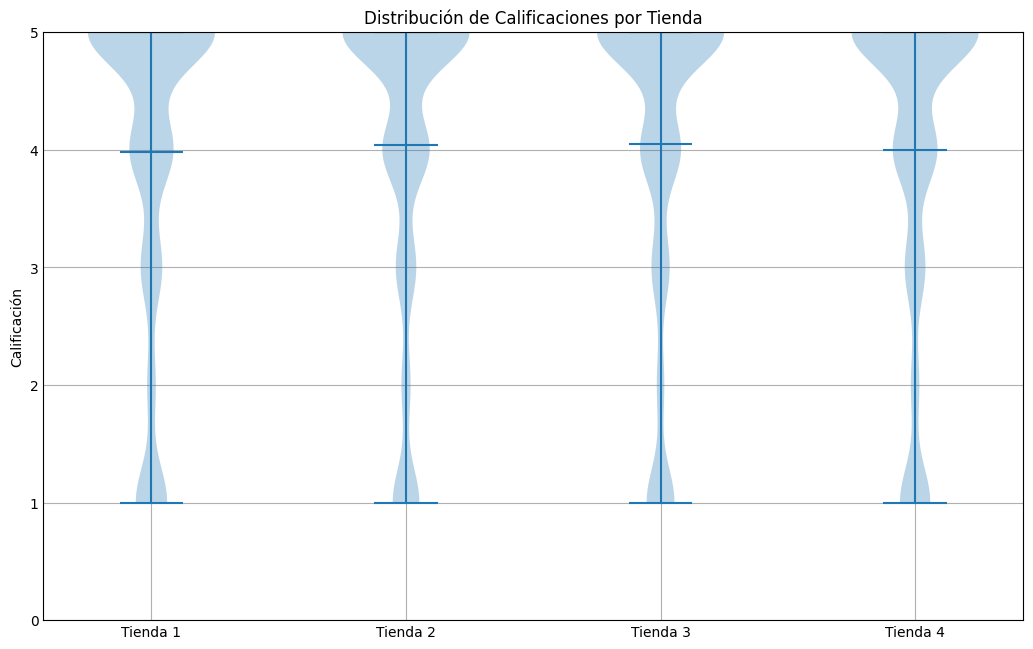

In [45]:
plt.style.use('_mpl-gallery')

## Arreglo para almacenar los datos de las calificaciones
ratings_data = [tienda['Calificación'].values,
                tienda2['Calificación'].values,
                tienda3['Calificación'].values,
                tienda4['Calificación'].values]

# graficar y mostrar los valores medios
fig, ax = plt.subplots(figsize=(10, 6))
vp = ax.violinplot(ratings_data, showmeans=True, showmedians=True)

# Agregar titulo y Etiquetas
ax.set_title('Distribución de Calificaciones por Tienda')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
ax.set_ylabel('Calificación')
ax.set_ylim([0, 5])

plt.show()

## 3.- Informe final

Basándose en la solicitud inicial del Sr. Juan, el propósito de este análisis es realizar una comparativa de la eficiencia de cada tienda y la recepción que tienen entre el públicio, con el objetivo de encontrar aquella que es más beneficioso vender.

Después del análisis, se sugiere que la tienda a vender sea la tienda número 4 por los siguientes motivos:

*  Se trata de la tienda que presentó menores ventas a lo largo del periodo analizado, vendiendo $112,504,700 menos que la tienda más eficiente.

*   Presenta la cantidad más baja en su categoría de producto menos vendido.

*   Así mismo, presenta los menores números evaluando los productos individuales más populares.

*   A pesar de no presentar diferencias significativas en el costo de envío promedio y las calificaciones de los usuarios, el impacto de las otras evaluaciones es considerable.

En conclusión, se recomienda vender la tienda número 4 y realizar un enfoque más estratégico en las tiendas restantes.

